# DJI Zenmuse L2 (Risley Prism Scanner) Demo
Notebook: Thomas Isensee & Hannah Weiser, 2025

This demo notebook uses the DJI Zenmuse L2 laser scanner, which is based on a risley beam deflector with three prisms. It has two scan modes, one that results in a repetitive scan pattern and one that results in a non-repetitive scan pattern.

We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
from IPython.display import Code
from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

In [2]:
import os

os.chdir("..")

## Survey 1: Repetitive scan pattern
Let us look at the XML files in the simulation. First, we investigate the survey XML file, `als_dji-zenmuse-l2-repetitive.xml`.

In [3]:
Code(display_xml("data/surveys/demo/als_dji-zenmuse-l2-repetitive.xml"), language="xml")

<document>
    <survey name="als_toyblocks_dji_zenmuse_l2" scene="data/scenes/demo/box_scene.xml#box_scene" platform="data/platforms.xml#sr22" scanner="data/scanners_als.xml#dji-zenmuse-l2-repetitive">

        <FWFSettings binSize_ns="0.2" beamSampleQuality="3" />
        
        <leg>
            <platformSettings x="0.0" y="-15.0" z="0.0" movePerSec_m="50" />
            <scannerSettings active="true" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="5.0" y="-15.0" z="0.0" movePerSec_m="50" />
            <scannerSettings active="false" />
        </leg>

    </survey>
</document>

This is a simple linear path survey with a single leg, which moves at 50 m/s for 5 m along the x-axis.

## Scanner
Now let's have a look how a scanner with a risley prism is defined. Here, the DJI Zenmuse L2, defined in `data/scanners_als.xml` is used, with the repetitive scan pattern (`dji-zenmuse-l2-repetitive`):

In [4]:
Code(
    display_xml("python/pyhelios/data/scanners_als.xml", "dji-zenmuse-l2-repetitive"),
    language="XML",
)

<scanner id="dji-zenmuse-l2-repetitive" accuracy_m="0.02" beamDivergence_rad="0.0027" name="DJI Zenmuse L2 (repetitive)" optics="risley" pulseFreqs_Hz="240000" pulseLength_ns="4" rangeMin_m="2" wavelength_nm="905" rotorFreq1_Hz="50" rotorFreq2_Hz="-50" rotorFreq3_Hz="-150" angle1_deg="-27.65251" angle2_deg="29.64349" angle3_deg="2.78088" refrIndex1="1.51" refrIndex2="1.51" refrIndex3="1.51" refrIndex_air="1.0">

    <FWFSettings beamSampleQuality="3" />

        <channels>
            <channel id="0">
                <incidentBeam x="-0.02687759" y="0.99963873" z="0" />
            </channel>
            <channel id="1">
                <incidentBeam x="-0.01613028" y="0.9998699" z="0" />
            </channel>
            <channel id="2">
                <incidentBeam x="-0.00537738" y="0.99998554" z="0" />
            </channel>
            <channel id="3">
                <incidentBeam x="0.00537738" y="0.99998554" z="0" />
            </channel>
            <channel id="4">
                <incidentBeam x="0.01613028" y="0.9998699" z="0" />
            </channel>
            <channel id="5">
                <incidentBeam x="0.02687759" y="0.99963873" z="0" />
            </channel>
        </channels>
  </scanner>

For this deflector type, the scan pattern is controlled by the rotation speeds (`rotorFreq1_Hz` and `rotorFreq2_Hz`, `rotorFreq3_Hz`) of three rotating risley prisms. This design is described in detail in [Qin et al. (2024)](https://doi.org/10.1016/j.optcom.2024.130915).

## Scene

Finally, let us take a look at the scene, `box_scene` in `data/scenes/demo/box_scene.xml`:

In [5]:
Code(display_xml("data/scenes/demo/box_scene.xml", "box_scene"))

<scene id="box_scene" name="box_scene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/box/box100.obj" />
            </filter>
        </part>
    </scene>

This is a simple scene, sonsisting of a cubix box (`box100.obj`) of 100 x 100 x 100 units, which is centered at the origin O(0,0,0). We typically use this scene for debugging purposes, because no shots get lost when scanning from within the box and the planar surfaces allow to control the scan pattern.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [6]:
!helios data/surveys/demo/als_dji-zenmuse-l2-repetitive.xml -q
output_path = find_playback_dir("data/surveys/demo/als_dji-zenmuse-l2-repetitive.xml")

## The results 
Now we can display the point cloud

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("Loading points from", Path(output_path))

sp_1 = np.loadtxt(Path(output_path) / "leg000_points.xyz")
print(sp_1.shape)

Loading points from d:\Software\_helios_versions\risley\helios\output\als_toyblocks_dji_zenmuse_l2\2025-07-31_14-59-10
(144006, 11)


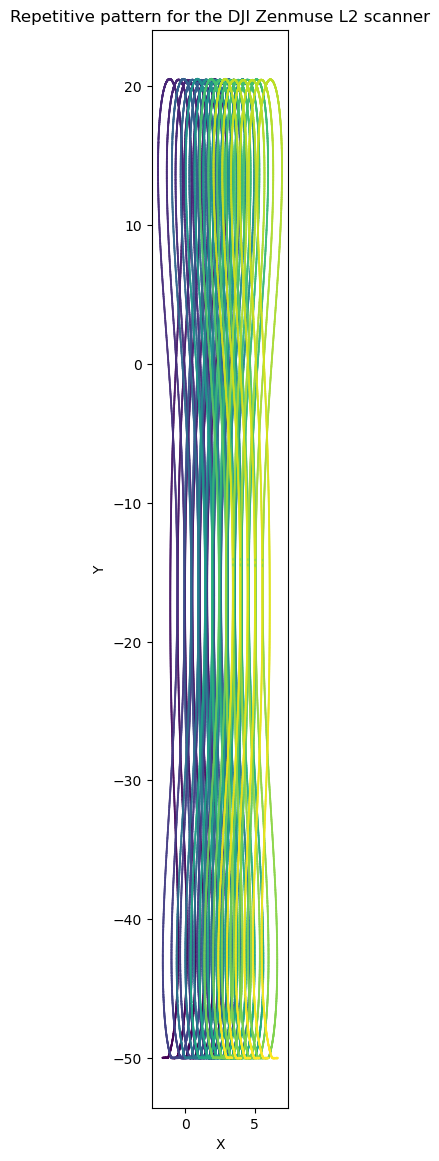

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 14))

ax.scatter(sp_1[:, 0], sp_1[:, 1], s=0.1, c=sp_1[:, 10])
ax.set_ylabel("Y")
ax.set_xlabel("X")
ax.set_title("Repetitive pattern for the DJI Zenmuse L2 scanner")
ax.set_aspect("equal", "box")

plt.show()

## Survey 2: Non-repetitive scan pattern

For the non-repetitive scan pattern, we will use a survey file that demonstrates the characteristics of the pattern using a static survey and different integration times, similar to the `9-tls_livox_demo` example. This is what the survey looks like:

In [9]:
Code(display_xml("data/surveys/demo/als_dji-zenmuse-l2-non-repetitive.xml"), language="xml")

<document>
    <survey name="als_toyblocks_dji_zenmuse_l2" scene="data/scenes/demo/box_scene.xml#box_scene" platform="data/platforms.xml#simple_linearpath" scanner="data/scanners_als.xml#dji-zenmuse-l2-non-repetitive">
        
        <FWFSettings binSize_ns="0.2" beamSampleQuality="3" />

        <leg>
        <!-- minimal leg 1: 0.01 m with speed of 0.05 m/s = 0.2 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="0.0" y="0.01" z="0.0" movePerSec_m="0.05" />
            <scannerSettings active="true" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="0.0" y="0.0" z="0.0" movePerSec_m="0.05" />
            <scannerSettings active="false" />
        </leg>
        
        <leg>
        <!-- minimal leg 2: 0.01 m with speed of 0.01 m/s = 1 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="0.0" y="0.01" z="0.0" movePerSec_m="0.01" />
            <scannerSettings active="true" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="0.0" y="0.0" z="0.0" movePerSec_m="0.01" />
            <scannerSettings active="false" />
        </leg>
        
        <leg>
        <!-- minimal leg 3: 0.01 m with speed of 0.005 m/s = 2 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="0.0" y="0.01" z="0.0" movePerSec_m="0.005" />
            <scannerSettings active="true" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="0.0" y="0.0" z="0.0" movePerSec_m="0.005" />
            <scannerSettings active="false" />
        </leg>

    </survey>
</document>

There are six `leg` elements corresponding to three scan positions (SPs) approximately at the origin O(0, 0, 0). Between the legs, the platform moves a very small distance along the x axis (0.01 m) with a certain speed (`movePerSec_m`). We use this as a temporary workaround for stationary scanners without any head rotation, for which the usual stopping criterion (end of scanner head rotation reached) does not apply.

With decreasing speed, the time between the legs, i.e., the integration time, increases and so does the resulting point density. The first SP has the shortest integration time with 0.2 s, the second SP uses an integration time of 1 s and the third SP uses an integration time of 2 s.

## Scanner

In HELIOS++, the non-repetitive mode of the DJI Zenmuse L2 is defined as a separate scanner in the `data/scanners_als.xml` file, with the name `dji-zenmuse-l2-non-repetitive`. The difference in the pattern is the result of different rotor frequencies for the three prisms.
Let's have a look at the definition:

In [10]:
Code(
    display_xml("python/pyhelios/data/scanners_als.xml", "dji-zenmuse-l2-non-repetitive"),
    language="XML",
)

<scanner id="dji-zenmuse-l2-non-repetitive" accuracy_m="0.02" beamDivergence_rad="0.0027" name="DJI Zenmuse L2 (non-repetitive)" optics="risley" pulseFreqs_Hz="240000" pulseLength_ns="4" rangeMin_m="2" wavelength_nm="905" rotorFreq1_Hz="10.5283" rotorFreq2_Hz="-51.6546" rotorFreq3_Hz="10.52833" angle1_deg="-27.65251" angle2_deg="29.64349" angle3_deg="2.78088" refrIndex1="1.51" refrIndex2="1.51" refrIndex3="1.51" refrIndex_air="1.0">

    <FWFSettings beamSampleQuality="3" />

        <channels>
            <channel id="0">
                <incidentBeam x="-0.02687759" y="0.99963873" z="0" />
            </channel>
            <channel id="1">
                <incidentBeam x="-0.01613028" y="0.9998699" z="0" />
            </channel>
            <channel id="2">
                <incidentBeam x="-0.00537738" y="0.99998554" z="0" />
            </channel>
            <channel id="3">
                <incidentBeam x="0.00537738" y="0.99998554" z="0" />
            </channel>
            <channel id="4">
                <incidentBeam x="0.01613028" y="0.9998699" z="0" />
            </channel>
            <channel id="5">
                <incidentBeam x="0.02687759" y="0.99963873" z="0" />
            </channel>
        </channels>
  </scanner>

## Executing the Simulation

In [11]:
!helios data/surveys/demo/als_dji-zenmuse-l2-non-repetitive.xml -q
output_path = find_playback_dir(
    "data/surveys/demo/als_dji-zenmuse-l2-non-repetitive.xml"
)

## The results 

Now we can display the point clouds.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("Loading points from", Path(output_path))

sp_1 = np.loadtxt(Path(output_path) / "leg000_points.xyz")
sp_2 = np.loadtxt(Path(output_path) / "leg002_points.xyz")
sp_3 = np.loadtxt(Path(output_path) / "leg004_points.xyz")
print(sp_1.shape)
print(sp_2.shape)
print(sp_3.shape)

Loading points from d:\Software\_helios_versions\risley\helios\output\als_toyblocks_dji_zenmuse_l2\2025-07-31_14-59-12
(288006, 11)
(1440000, 11)
(2880018, 11)


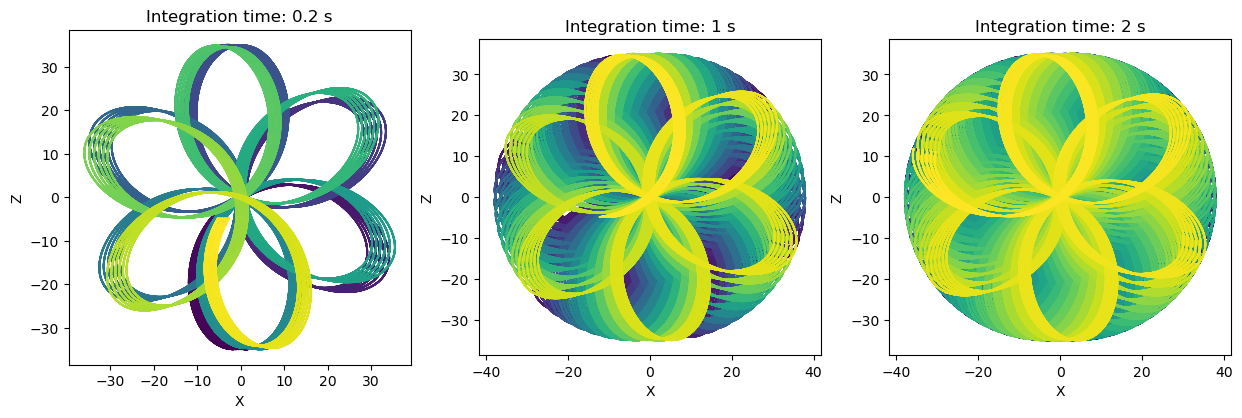

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.scatter(sp_1[:, 0], sp_1[:, 2], s=0.1, c=sp_1[:, 10])
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_title("Integration time: 0.2 s")
ax1.set_aspect("equal", "box")

ax2.scatter(sp_2[:, 0], sp_2[:, 2], s=0.1, c=sp_2[:, 10])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_title("Integration time: 1 s")
ax2.set_aspect("equal", "box")

ax3.scatter(sp_3[:, 0], sp_3[:, 2], s=0.1, c=sp_3[:, 10])
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.set_title("Integration time: 2 s")
ax3.set_aspect("equal", "box")

plt.show()